# Trabajo Practico 4

## Parte 1

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [102]:
# Importamos la base de datos.
df_original_hog = pd.read_excel(r'usu_hogar_T123.xlsx')

# Importamos la tabla de la encuesta individual.
df_original_ind = pd.read_excel(r'usu_individual_T123.xlsx')

In [103]:
# Nos quedamos con los datos correspondientes a los aglomerados de Ciudad Autónoma de Buenos Aires y Gran Buenos Aires.
df_hog = df_original_hog[(df_original_hog['AGLOMERADO'] == 32) | (df_original_hog['AGLOMERADO'] == 33)]

# Para esta encuesta también nos quedamos con los datos correspondientes a los aglomerados de Ciudad Autónoma de Buenos Aires y Gran Buenos Aires.
df_ind = df_original_ind[(df_original_ind['AGLOMERADO'] == 32) | (df_original_ind['AGLOMERADO'] == 33)]

In [232]:
# Unimos las tablas a partir de la columna CODUSU, que refiere al número de identificación del registro y que permite relacionar a las viviendas con los hogares y las personas.
df = df_hog.merge(df_ind, on=['CODUSU', 'NRO_HOGAR'], how='outer')

In [233]:
# Primer paso:

types = []

for columna in df.columns:
    if df[columna].dtypes not in types:
        types.append(df[columna].dtypes)
        
print('Formatos de las variables:', types)

nums = ['float64','int64']
listado = []

for columna in df.columns:
    if df[columna].dtypes in nums:
        listado.append(columna)

print('Listado de variables que corregiremos:', listado)

# Segundo paso:

print('\nShape de la base de CABA y GBA: ', df.shape)

for i in listado:
    df = df[((df[[i]] >= 0) | (df[[i]].isna())).all(1)]

df

Formatos de las variables: [dtype('O'), dtype('int64'), dtype('float64')]
Listado de variables que corregiremos: ['ANO4_x', 'TRIMESTRE_x', 'NRO_HOGAR', 'REALIZADA', 'REGION_x', 'AGLOMERADO_x', 'PONDERA_x', 'IV1', 'IV2', 'IV3', 'IV4', 'IV5', 'IV6', 'IV7', 'IV8', 'IV9', 'IV10', 'IV11', 'IV12_1', 'IV12_2', 'IV12_3', 'II1', 'II2', 'II3', 'II3_1', 'II4_1', 'II4_2', 'II4_3', 'II5', 'II5_1', 'II6', 'II6_1', 'II7', 'II8', 'II9', 'V1', 'V2', 'V21', 'V22', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19_A', 'V19_B', 'IX_TOT', 'IX_MEN10', 'IX_MAYEQ10', 'ITF_x', 'DECIFR_x', 'IDECIFR_x', 'RDECIFR_x', 'GDECIFR_x', 'PDECIFR_x', 'ADECIFR_x', 'IPCF_x', 'DECCFR_x', 'IDECCFR_x', 'RDECCFR_x', 'GDECCFR_x', 'PDECCFR_x', 'ADECCFR_x', 'PONDIH_x', 'VII1_1', 'VII1_2', 'VII2_1', 'VII2_2', 'VII2_3', 'VII2_4', 'ANO4_y', 'TRIMESTRE_y', 'COMPONENTE', 'H15', 'REGION_y', 'AGLOMERADO_y', 'PONDERA_y', 'CH03', 'CH04', 'CH06', 'CH07', 'CH08', 'CH09', 'CH10', 'C

,CODUSU,ANO4_x,TRIMESTRE_x,NRO_HOGAR,REALIZADA,REGION_x,MAS_500_x,AGLOMERADO_x,PONDERA_x,IV1,...,PDECIFR_y,ADECIFR_y,IPCF_y,DECCFR_y,IDECCFR_y,RDECCFR_y,GDECCFR_y,PDECCFR_y,ADECCFR_y,PONDIH_y
1,TQRMNORVYHMOTSCDEIJAH00802517,2023,1,1,1,1,S,33,1066,1,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
3,TQRMNOSQRHLLTTCDEIJAH00719390,2023,1,1,1,1,S,33,2270,2,...,NaN,5,79000.0,6,NaN,6,6.0,NaN,7,4733
4,TQSMNOSQRHLLTTCDEIJAH00719389,2023,1,1,1,1,S,33,2161,1,...,NaN,3,96000.0,7,NaN,7,7.0,NaN,8,2672
5,TQRMNORTUHKOQQCDEIJAH00780489,2023,1,1,1,1,S,33,3097,1,...,NaN,4,125000.0,8,NaN,8,8.0,NaN,9,4844
6,TQRMNOUTRHKNQMCDEIJAH00802590,2023,1,1,1,1,S,33,2571,1,...,NaN,4,120000.0,8,NaN,8,8.0,NaN,9,3482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7614,TQRMNOSSQHKOOMCDEIJAH00802644,2023,1,1,1,1,S,33,3381,1,...,NaN,1,14750.0,1,NaN,1,1.0,NaN,1,4548
7615,TQRMNOSSQHKOOMCDEIJAH00802644,2023,1,1,1,1,S,33,3381,1,...,NaN,1,14750.0,1,NaN,1,1.0,NaN,1,4548
7616,TQRMNOSSQHKOOMCDEIJAH00802644,2023,1,1,1,1,S,33,3381,1,...,NaN,1,14750.0,1,NaN,1,1.0,NaN,1,4548
7617,TQRMNORYPHJKNPCDEIJAH00794297,2023,1,1,1,1,S,33,521,1,...,NaN,1,32000.0,2,NaN,2,2.0,NaN,2,896


In [219]:
# Procedemos a crear una función que elimina un conjunto de variables que no nos serán útiles en nuestro trabajo.
# En primer lugar, elimina variables que indican deciles de ingreso. Al determinarse a partir del ingreso, pueden correlacionar con este.
# En segundo lugar, también se deshace de variables que terminan con "_ESP". Estas son de tipo string y añaden información sobre lo que indica la variable homónima pero sin "_ESP" al final. Por ejemplo, "IV1_ESP" especifica el tipo de vivienda (IV1) cuando la vivienda no corresponde a ninguna categoría comprendida por "IV1".

def df_firstfilter(df):
    decil_list = variables_to_remove = ["DECIFR_x", "IDECIFR_x", "RDECIFR_x", "GDECIFR_x", "PDECIFR_x", "ADECIFR_x","DECCFR_x", "IDECCFR_x", "RDECCFR_x", "GDECCFR_x", "PDECCFR_x", "ADECCFR_x","DECOCUR", "IDECOCUR", "RDECOCUR", "GDECOCUR", "PDECOCUR", "ADECOCUR","DECINDR", "IDECINDR", "RDECINDR", "GDECINDR", "PDECINDR", "ADECINDR", "DECIFR_y", "IDECIFR_y", "RDECIFR_y", "GDECIFR_y", "PDECIFR_y", "ADECIFR_y","DECCFR_y", "IDECCFR_y", "RDECCFR_y", "GDECCFR_y", "PDECCFR_y", "ADECCFR_y"]
    for var in decil_list:
        if var in df.columns:
            df = df.drop(var, axis=1)
    
    for var in df.columns:
        if var.endswith("_ESP"):
            df = df.drop(var, axis=1)
    
    return df

In [234]:
# Chequeamos los missing values de las variables para decidir cuáles mantenemos.

df = df_firstfilter(df)

missings = df.isna().sum().sort_values(ascending=False)
pd.set_option('display.max_rows', None)
print(missings)

print(df.shape)

IMPUTA          5920
CH16_COD        5859
PP11D_COD       5755
PP11G_ANO       5680
PP11Q           5680
PP11O           5680
PP11N           5680
PP11M           5680
PP11L1          5680
PP11L           5680
PP11G_DIA       5680
PP11G_MES       5680
PP11C99         5680
PP11C           5680
PP11B2_DIA      5680
PP11B2_ANO      5680
PP11B2_MES      5680
PP11B1          5680
PP11B_COD       5680
PP11A           5680
PP10E           5680
PP10D           5680
PP10C           5680
PP11P           5680
PP11R           5680
PP10A           5680
PP11T           5680
PP11S           5680
CH15_COD        4892
PP06C           3728
PP07F1          3728
PP07E           3728
PP07D           3728
PP07C           3728
PP07A           3728
PP06H           3728
PP06E           3728
PP06D           3728
PP05B2_MES      3728
PP06A           3728
PP05F           3728
PP05B2_ANO      3728
PP05E           3728
PP05C_3         3728
PP05C_2         3728
PP05C_1         3728
PP05B2_DIA      3728
PP05H        

A continuación, detallamos las razones de por qué existen missing values en las variables restantes y decidimos si las eliminaremos o no de nuestra base.

En primer lugar, la variable "IMPUTA" indica en qué casos las características de los miembros del hogar se encuentran imputadas. El porcentaje de missings es del 99,57 %. Esta variable será eliminada.

En segundo lugar, variables que comienzan con "PP10" o "PP11" indican características de solo un subconjunto de individuos: los desocupados y los desocupados con empleo anterior, respectivamente. Para todas ellas el porcentaje de missings es de 95 % en adelante. Prescidiremos de todas estas variables, ya que no creemos necesario utilizarlas en nuestras predicciones.

En tercer lugar, las variables que comienzan con nombres que van desde el "PP03" al "PP09" (incluyendo "INTENSI", "PP3E_TOT" y "PP3F_TOT") indican características solo para aquellos individuos ocupados. Por lo que quienes no estén en ese grupo tienen missings en esas variables. En todas las variables el porcentaje de missing values es de 62,72 %. También eliminaremos estas columnas debido a que las utilizaremos.

En cuarto lugar, la variable "CH14" indica cuál es el último año aprobado en el nivel educativo señalado en la variable "CH12", únicamente en caso de no haber finalizado dicho nivel. Así, la variable tiene solo missing values en aquellos individuos que no hayan finalizado el nivel educativo señalada en "CH12". El porcentaje total de missings es de 46,55 %. Decidimos eliminar esta variable, ya que creemos suficiente el dato de si terminaron o no el nivel educativo ("CH13") indicado en "CH12". 

En quinto lugar, la variable "P47T" indica el monto de ingreso total individual. Esta columna solo tiene 23 missing values (0,4 %). Debido a que se trata de la sumatoria de los ingresos laborales y no laborales, imputaremos aquellas observaciones con missing de la siguiente manera:

P47T (ingreso total individual) = P21 (ingreso de la ocupación principal) + TOT_P12 (ingreso de otras ocupaciones) + T_VI (ingresos no laborales)

Además, a continuación veremos qué porcentaje de la base total un ingreso total individual (P47T) igual a la sumatoria de estas variables, con el objetivo de observar cuán fiable es nuestra imputación.

In [235]:
# Chequeo imputación:

df2 = df.copy()

df2['P47T_2'] = df2['P21'] + df2['TOT_P12'] + df2['T_VI']

df2 = df2[['P47T_2', 'P47T', 'P21', 'TOT_P12', 'T_VI']]

df2 = df2[df2['P47T_2'] != df2['P47T']]

print(df2.shape)

# La variable P47T original difiere de la generada por la imputación solo en 370 observaciones (6,22 % del total). Por lo que la imputación es exactamente igual a la variable original en el 93,78 % de las observaciones.

print("")
print('Media de la variable generada a partir de la imputación:', round(df2['P47T_2'].mean()))
print('Desvío estándar de la variable generada a partir de la imputación:', round(df2['P47T_2'].std()))
print("")
print('Media de la variable original:', round(df['P47T'].mean()))
print('Desvío estándar de la variable original:', round(df['P47T'].std()))

# La variable original del ingreso tiene un promedio mayor ($73.140 a $68.525) a la generada por la imputación, que está enteramente dado por el 6,22 % de observaciones señaladas previamente.
# No obstante, creemos que nuestra metodología de imputación es óptima, por lo que continuaremos con la imputación.

df2 = df.copy()

df2['P47T_2'] = df2['P21'] + df2['TOT_P12'] + df2['T_VI']

df2 = df2[['P47T_2', 'P47T', 'P21', 'TOT_P12', 'T_VI']]

df2 = df2[pd.isnull(df2['P47T'])]

df2

# A modo de observación señalamos que todas las observaciones con missing values en "P47T" tendrán 0 en dicha variable debido a que todos los ingresos laborales y no laborales son 0.

(370, 5)

Media de la variable generada a partir de la imputación: 160446
Desvío estándar de la variable generada a partir de la imputación: 120000

Media de la variable original: 73140
Desvío estándar de la variable original: 176892


,P47T_2,P47T,P21,TOT_P12,T_VI
66,0,NaN,0,0,0
308,0,NaN,0,0,0
978,0,NaN,0,0,0
979,0,NaN,0,0,0
981,0,NaN,0,0,0
982,0,NaN,0,0,0
1750,0,NaN,0,0,0
3864,0,NaN,0,0,0
3868,0,NaN,0,0,0
3985,0,NaN,0,0,0


In [236]:
# Imputación de la variable P47T:

print('Media de la variable original:', round(df['P47T'].mean()))
print('Desvío estándar de la variable original:', round(df['P47T'].std()))

modified_rows_P47T = []

for j in range(0, 5944, 1):
    row = df.iloc[j].copy()
    if pd.isnull(row['P47T']):
        row['P47T'] = row['P21'] + row['TOT_P12'] + row['T_VI']
    
    modified_rows_P47T.append(row)
    
df = pd.DataFrame(modified_rows_P47T)

df2 = df.copy()
df2 = df2[pd.isnull(df2['P47T'])]
print("")
print(df2.shape)

# Nótese que no hay observaciones en las que P47T sea "null". Vemos así que se imputaron todos los valores en los que era missing.

print("")
print('Media de la variable original imputada:', round(df['P47T'].mean()))
print('Desvío estándar de la variable original imputada:', round(df['P47T'].std()))

Media de la variable original: 73140
Desvío estándar de la variable original: 176892

(0, 220)

Media de la variable original imputada: 72857
Desvío estándar de la variable original imputada: 176608


Por último, otras variables con alto porcentaje de missing values son "CH16_COD" (98,57 %, solo 85 observaciones no missings), "CH15_COD" (82,3 %, solo 1052 no missings). Estas ofrecen información extra vinculada a lo que indica la variable homónima pero sin "_COD" al final. Por ejemplo, "CH15_COD" especifica el código de provincia o país cuando a la pregunta de dónde nació el individuo de la observación (CH15) se indica que nació en otra provincia o país.

In [237]:
frecuencia = df['CH16_COD'].value_counts()
print("Frecuencia de códigos:")
print(frecuencia)

Frecuencia de códigos:
226.0    39
203.0     9
54.0      5
22.0      4
82.0      4
221.0     4
50.0      4
14.0      3
205.0     2
90.0      2
74.0      1
58.0      1
410.0     1
86.0      1
78.0      1
18.0      1
34.0      1
66.0      1
225.0     1
Name: CH16_COD, dtype: int64


Debido al alto porcentaje de missings para CH16_COD (que especifica código correspondiente de provincia o país en el que el individuo vivió 5 años antes de la encuesta), prescindiremos de la variable.

In [238]:
frecuencia2 = df['CH15_COD'].value_counts()
print("Frecuencia de los códigos:")
print(frecuencia2)

print("")
print(f"Media: {df['CH15_COD'].mean()}")
print(f"Mínimo: {df['CH15_COD'].min()}")
print(f"Máximo: {df['CH15_COD'].max()}")
print(f"Desvío estándar: {df['CH15_COD'].std()}")

Frecuencia de los códigos:
221.0    138
18.0      84
22.0      77
226.0     77
90.0      74
86.0      73
202.0     64
30.0      60
54.0      41
14.0      38
222.0     36
82.0      30
66.0      28
225.0     22
203.0     19
34.0      18
50.0      17
417.0     16
38.0      15
410.0     15
205.0      9
208.0      9
70.0       8
10.0       8
74.0       8
58.0       6
94.0       6
46.0       6
78.0       6
310.0      5
62.0       5
425.0      4
42.0       4
26.0       4
209.0      3
207.0      2
131.0      2
308.0      2
445.0      2
212.0      2
412.0      2
409.0      1
422.0      1
320.0      1
438.0      1
317.0      1
210.0      1
211.0      1
Name: CH15_COD, dtype: int64

Media: 127.66159695817491
Mínimo: 10.0
Máximo: 445.0
Desvío estándar: 103.2684672850872


Para el caso de CH15_COD sí contamos con varios códigos con "alta" frecuencia (mayor a 20).

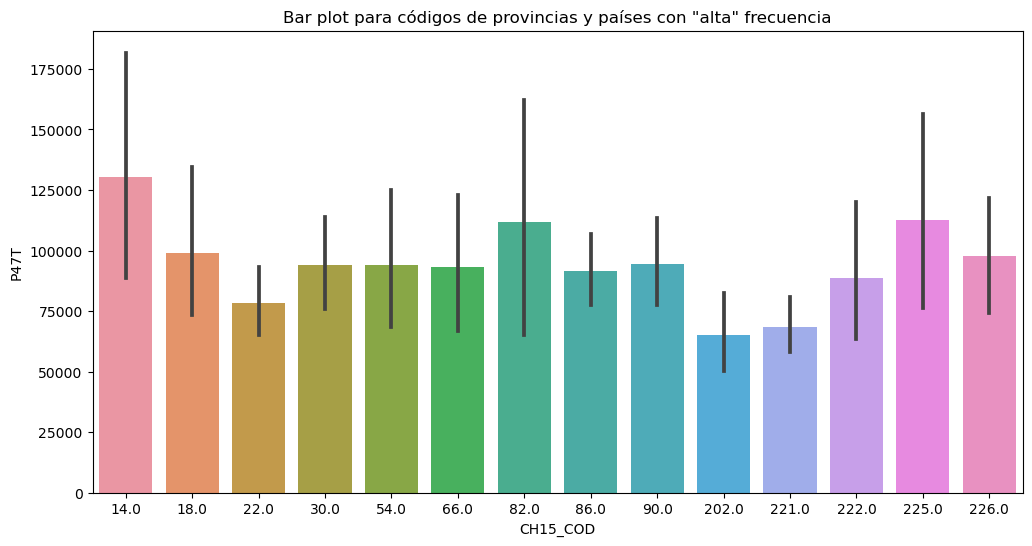

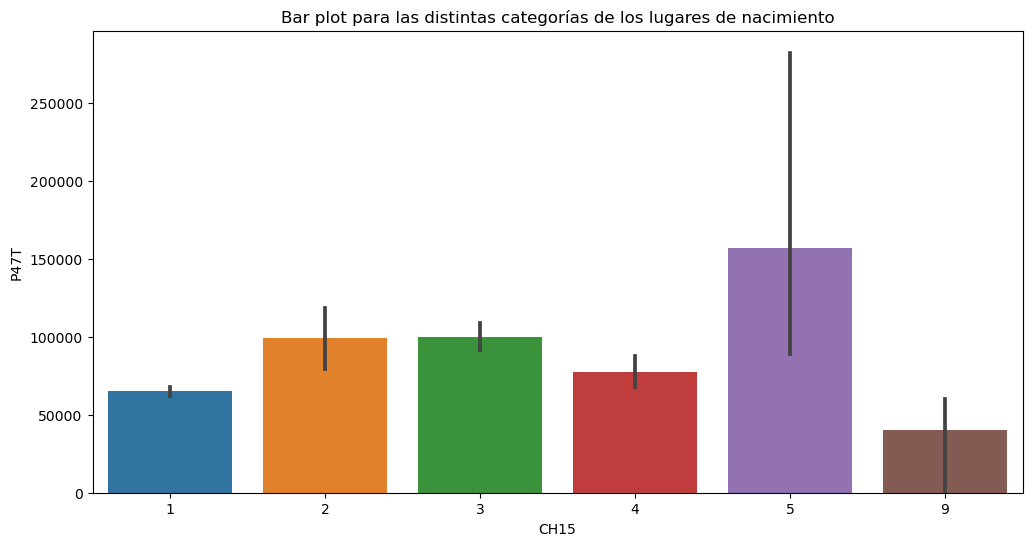

In [239]:
# Analizaremos solo los códigos que figuran más de 20 veces. Esto es arbitrario.

min_frecuencia = frecuencia2[frecuencia2 > 20].index

filtered_df = df[df['CH15_COD'].isin(min_frecuencia)]

plt.figure(figsize=(12, 6))
sns.barplot(x='CH15_COD', y='P47T', data=filtered_df)

# Para estos códigos observaremos si existe alguna diferencia clara en el ingreso total individual (P47T), con el objetivo de saber si puede llegar a ser una variable útil.

plt.xlabel('CH15_COD')
plt.ylabel('P47T')
plt.title('Bar plot para códigos de provincias y países con "alta" frecuencia')

plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='CH15', y='P47T', data=df)

# Ahora observamos el promedio de P47T para el resto de categorías de lugares de nacimiento.

plt.xlabel('CH15')
plt.ylabel('P47T')
plt.title('Bar plot para las distintas categorías de los lugares de nacimiento')

plt.show()

Los gráficos anteriores nos permiten sacar algunas conclusiones sobre la utilidad de la variable "CH15_COD".

Por un lado, observamos que no parece haber país o provincia de nacimiento (distinta a la que vive en el momento de la encuesta cada individuo) que, con contundencia, nos indique un mayor ingreso total individual. Las provincias toman códigos menores a 100 y los países mayores a dicho número.

Por otro lado, al graficar el ingreso total individual por categoría de lugar de nacimiento, vemos que las personas nacidas en países no limítrofes (categoría 5) parecen tener ingresos mayores. No obstante, al revisar el primer gráfico los únicos países que allí se encuentran son Bolivia (202), Paraguay (221), Perú (222), Uruguay (225) y Venezuela (226). Bolivia, Paraguay y Uruguay son limítrofes a Argentina, por lo que pertenecen a la categoría 4 del segundo gráfico. Mientras que Perú y Venezuela forman parte de la categoría 5.

La pregunta que surge es cómo los individuos de la categoría 5 parecen presentar ingresos mayores si en el gráfico 1 vimos que para los individuos provenientes Uruguay y Venezuela este no parece ser el caso. La conclusión a la que llegamos es que los ingresos mayores observables en la categoría 5 del segundo gráfico parecen deberse a extranjeros provenientes de países de "baja" frecuencia. Así, los ingresos mayores están determinados por individuos nacidos en países "outliers".

Debido a esto y a que los ingresos de los individuos del grupo 5 son mayores pero tienen alta varianza, hemos decidido eliminar "CH15_COD" al no aportar una utilidad suficiente.

In [241]:
# Procedemos a crear una función que nos devuelva nuestro Data Frame sin columnas con missing values.

def df_without_missings(df):
    
    pd.set_option('display.max_rows', 10)
    varwithoutmissings = []
    
    missing_values = missings.reset_index().rename(columns={'index': 'Variable', 0:'Missings'})
    
    for i in range(0, len(missing_values)):
        if missing_values['Missings'][i] ==  0:
            varwithoutmissings.append(missing_values['Variable'][i])

    print('Cantidad de variables con missings:', (len(df.columns)-len(varwithoutmissings)))
    
    dftest = df[varwithoutmissings]
    
    print('\nShape del viejo Data Frame:', df.shape)
    
    print('\nShape del nuevo Data Frame:', dftest.shape)
    
    return dftest

In [242]:
# Ahora creamos una función que nos devuelva nuestro Data Frame sin columnas duplicadas. A partir del merge de dos Data Frames, hay variables que pueden duplicarse y que, por lo tanto, no aportan información adicional. Procederemos a generar una función que permita eliminar estas columnas del df.

def df_clean_duplicates(df):
    
    df_original = df.copy()
    df = df.T.drop_duplicates().T

    print('Cantidad de variables duplicadas:', (len(df_original.columns)-len(df.columns)))
    print('\nLista de variables duplicadas:')
          
    for i in range(0,len(df_original.columns)):
        if df_original.columns[i] not in df.columns:
            print(df_original.columns[i])
          
    print('\nShape del nuevo Data Frame:', df.shape)
        
    return df

In [243]:
df = df_without_missings(df)

# Correr solo una vez
df = df_clean_duplicates(df)

Cantidad de variables con missings: 93

Shape del viejo Data Frame: (5944, 220)

Shape del nuevo Data Frame: (5944, 127)
Cantidad de variables duplicadas: 12

Lista de variables duplicadas:
REALIZADA
REGION_x
V19_B
ITF_x
IPCF_x
PONDERA_y
ANO4_y
TRIMESTRE_y
REGION_y
MAS_500_y
AGLOMERADO_y
PONDIH_y

Shape del nuevo Data Frame: (5944, 115)


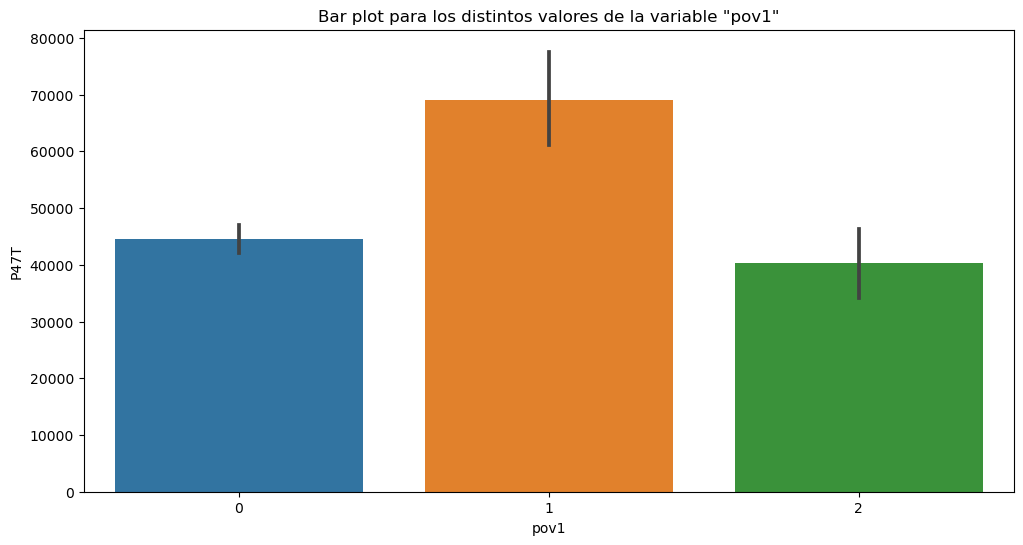

In [245]:
# Construcción de dos variables.

# En primer lugar, generamos la variable "pov1" que toma valor 1 cuando el individuo migró desde algún lado y es varón, y toma valor 2 si migró desde algún lado y es mujer.
# Por el contrario, es cero si nació en el mismo lugar en el que se realizó la encuesta.
# Una hipótesis detrás de esto, es que aquellos que migran buscan mejores condiciones de vida, pero en el caso de las familias es el hombre quien suele aventurarse mientras que la mujer se queda en el lugar de origen. Por esa razón hacemos una distinción por género.

df['pov1'] = 0  # Initialize with 0
df.loc[(df['CH04'] == 1) & (df['CH15'] != 1) & (df['CH15'] != 9), 'pov1'] = 1
df.loc[(df['CH04'] == 2) & (df['CH15'] != 1) & (df['CH15'] != 9), 'pov1'] = 2

plt.figure(figsize=(12, 6))
sns.barplot(x='pov1', y='P21', data=df)

plt.xlabel('pov1')
plt.ylabel('P47T')
plt.title('Bar plot para los distintos valores de la variable "pov1"')

plt.show()

In [246]:
valores_m = [.35,.37,.46,.51,.55,.6,.64,.66,.68,.69,.7,.72,.74,.76,.76,.77,.77,.77,.76,.77,.76,.67,.63]
valores_h = [.35,.37,.46,.51,.55,.6,.64,.66,.68,.69,.79,.82,.85,.9,.96,1,1.03,1.04,1.02,1,1,.83,.74]
df['adulto_equiv'] = 0

In [247]:
modified_rows = []

for j in range(0, 5944, 1):
    row = df.iloc[j].copy()
    if row['CH04'] == 2:
        for i in range(0, 18):
            if row['CH06'] == i:
                row['adulto_equiv'] = valores_m[i]
        if row['CH06'] in range(18,30):
            row['adulto_equiv'] = valores_m[18]
        elif row['CH06'] in range(30,46):
            row['adulto_equiv'] = valores_m[19]
        elif row['CH06'] in range(46,61):
            row['adulto_equiv'] = valores_m[20]
        elif row['CH06'] in range(61,76):
            row['adulto_equiv'] = valores_m[21]
        elif row['CH06'] in range(76,99):
            row['adulto_equiv'] = valores_m[22]
    
    else:
        for i in range(0,18,1):
            if row['CH06'] == i:
                row['adulto_equiv'] = valores_h[i]
        if row['CH06'] in range(18,30):
            row['adulto_equiv'] = valores_h[18]
        elif row['CH06'] in range(30,46):
            row['adulto_equiv'] = valores_h[19]
        elif row['CH06'] in range(46,61):
            row['adulto_equiv'] = valores_h[20]
        elif row['CH06'] in range(61,76):
            row['adulto_equiv'] = valores_h[21]
        elif row['CH06'] in range(76,100):
            row['adulto_equiv'] = valores_h[22]
    modified_rows.append(row)

df = pd.DataFrame(modified_rows)
df

,V12_M,V18_M,V19_AM,IPCF_y,V21_M,T_VI,ITF_y,V10_M,V11_M,V2_M,...,PONDIH_x,VII1_1,VII2_1,VII2_2,VII2_3,VII2_4,COMPONENTE,H15,pov1,adulto_equiv
1,0,0,0,0.0,0,0,0,0,0,0,...,0,1,98,0,0,0,2,1,0,0.76
3,0,0,0,79000.0,0,0,158000,0,0,0,...,4733,1,2,0,0,0,2,1,0,0.77
4,0,0,0,96000.0,0,96000,96000,0,0,86000,...,2672,1,98,0,0,0,1,1,0,0.63
5,0,0,0,125000.0,40000,125000,125000,0,0,85000,...,4844,1,98,0,0,0,1,1,2,0.63
6,0,0,0,120000.0,0,0,120000,0,0,0,...,3482,1,97,0,0,0,1,1,0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7614,0,0,0,14750.0,0,0,59000,0,0,0,...,4548,1,2,0,0,0,2,1,0,0.76
7615,0,0,0,14750.0,0,0,59000,0,0,0,...,4548,1,2,0,0,0,3,1,0,0.76
7616,0,0,0,14750.0,0,0,59000,0,0,0,...,4548,1,2,0,0,0,4,0,0,0.66
7617,0,0,0,32000.0,0,0,64000,0,0,0,...,896,1,2,0,0,0,1,1,2,0.67


In [248]:
df['ad_equiv_hogar'] = df.groupby('CODUSU')['adulto_equiv'].transform('sum')
df

,V12_M,V18_M,V19_AM,IPCF_y,V21_M,T_VI,ITF_y,V10_M,V11_M,V2_M,...,VII1_1,VII2_1,VII2_2,VII2_3,VII2_4,COMPONENTE,H15,pov1,adulto_equiv,ad_equiv_hogar
1,0,0,0,0.0,0,0,0,0,0,0,...,1,98,0,0,0,2,1,0,0.76,0.76
3,0,0,0,79000.0,0,0,158000,0,0,0,...,1,2,0,0,0,2,1,0,0.77,0.77
4,0,0,0,96000.0,0,96000,96000,0,0,86000,...,1,98,0,0,0,1,1,0,0.63,0.63
5,0,0,0,125000.0,40000,125000,125000,0,0,85000,...,1,98,0,0,0,1,1,2,0.63,0.63
6,0,0,0,120000.0,0,0,120000,0,0,0,...,1,97,0,0,0,1,1,0,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7614,0,0,0,14750.0,0,0,59000,0,0,0,...,1,2,0,0,0,2,1,0,0.76,2.95
7615,0,0,0,14750.0,0,0,59000,0,0,0,...,1,2,0,0,0,3,1,0,0.76,2.95
7616,0,0,0,14750.0,0,0,59000,0,0,0,...,1,2,0,0,0,4,0,0,0.66,2.95
7617,0,0,0,32000.0,0,0,64000,0,0,0,...,1,2,0,0,0,1,1,2,0.67,1.69


In [249]:
respondieron = df[df['ITF_y'] != 0].copy()
norespondieron = df[df['ITF_y'] == 0].copy()

print(df.shape)
print(respondieron.shape)
print(norespondieron.shape)
print('\n%.0f personas no respondieron cuál es su ingreso familiar total (ITF).' %len(norespondieron))

respondieron['ingreso_necesario'] = respondieron['ad_equiv_hogar']*57371.05

(5944, 118)
(4158, 118)
(1786, 118)

1786 personas no respondieron cuál es su ingreso familiar total (ITF).


In [250]:
respondieron['pobre'] = (respondieron['ITF_y'] < respondieron['ingreso_necesario']).astype(int)

print("Identificamos %.0f pobres." %np.sum(respondieron['pobre']))
print("Esto equivale a un %.2f por ciento de pobres de la base respondieron." %((np.sum(respondieron['pobre']/len(respondieron)))*100))

Identificamos 1547 pobres.
Esto equivale a un 37.21 por ciento de pobres de la base respondieron.


## Parte 2

In [251]:
from sklearn.metrics import (
    confusion_matrix,
    roc_curve,
    roc_auc_score,
    accuracy_score,
    mean_squared_error,
    precision_score,
)


def evalua_metodo(modelo, X_train, y_train, X_test, y_test):
    """
    Evalúa un modelo utilizando métricas como la matriz de confusión,
    las curvas ROC, el valor de AUC y el accuracy score.

    Parameters:
    - modelo: El modelo a evaluar (debe ser compatible con la interfaz de scikit-learn).
    - X_train: Datos de entrenamiento.
    - y_train: Etiquetas de entrenamiento.
    - X_test: Datos de prueba.
    - y_test: Etiquetas de prueba.

    Returns:
    - metricas: Un diccionario con las métricas evaluadas.
    """
    # Ajustar el modelo con los datos de entrenamiento
    modelo.fit(X_train, y_train)

    # Predecir en los datos de prueba
    y_pred = modelo.predict(X_test)

    # Calcular la matriz de confusión
    vp, fp, fn, vn = confusion_matrix(y_test, y_pred).ravel()

    # Calcular las curvas ROC y los valores de AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)

    # Calcular el accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Calcular la precision
    precision = precision_score(y_test, y_pred, zero_division=0.0)

    # Calcular el ECM
    ecm = mean_squared_error(y_test, y_pred)

    # Crear una colección con las métricas evaluadas
    metricas = {
        "Verdaderos Positivos": vp,
        "Verdaderos Negativos": vn,
        "Falsos Positivos": fp,
        "Falsos Negativos": fn,
        "AUC": auc_score,
        "Accuracy": accuracy,
        "Precision": precision,
        "ECM": ecm,
    }
    return metricas

In [252]:
from sklearn.model_selection import KFold
import numpy as np


def cross_validation(modelo, k, X, y):
    """
    Realiza validación cruzada con k iteraciones y evalúa el modelo en cada iteración.

    Parameters:
    - modelo: Objeto del modelo a evaluar.
    - k: Número de iteraciones para cross validation.
    - X: Datos de entrada.
    - y: Etiquetas.

    Returns:
    - list: Lista de diccionarios con métricas para cada iteración.
    """
    kf = KFold(n_splits=k, shuffle=True)
    metricas_iteraciones = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        metricas_iteracion = evalua_metodo(modelo, X_train, y_train, X_test, y_test)
        metricas_iteraciones.append(metricas_iteracion)

    return {
        key: np.mean(
            [metricas_iteracion[key] for metricas_iteracion in metricas_iteraciones]
        )
        for key in metricas_iteraciones[0].keys()
    }

In [253]:
def evalua_config(modelo, hiperparametros, X, y, k):
    """
    Evalúa diferentes configuraciones de hiperparámetros utilizando validación cruzada.

    Parameters:
    - modelo: Objeto del modelo a evaluar.
    - hiperparametros: Lista de configuraciones de hiperparámetros a probar.
    - X: Datos de entrada.
    - y: Etiquetas.
    - k: Número de iteraciones para cross validation.

    Returns:
    - dict: Configuración con menor error promedio.
    """
    error = []
    for config in hiperparametros:
        modelo.set_params(**config)
        metricas = cross_validation(modelo, k, X, y)
        error.append((config, metricas))
    try: 
        mejor_config = min(error, key=lambda x: x[1]['ECM'])
    except ValueError:
        metricas = cross_validation(modelo, k, X, y)
        mejor_config = {}, metricas
    return mejor_config

In [254]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    GradientBoostingClassifier,
)
import pandas as pd


def evalua_multiples_metodos(hiperparametros, X, y, k=5):
    """
    Evalúa varios modelos con diferentes hiperparámetros y muestra los resultados.

    Parameters:
    - hiperparametros: Lista de configuraciones de hiperparámetros a probar.
    - X: Datos de entrada.
    - y: Etiquetas.
    - k: Número de iteraciones para validación cruzada. Por defecto, k=5.
    """
    df_dict = {}
    # Configurar modelos con hiperparámetros
    for nombre_modelo in [
        "LogisticRegression",
        "LinearDiscriminantAnalysis",
        "KNeighborsClassifier",
        "DecisionTreeClassifier",
        "BaggingClassifier",
        "RandomForestClassifier",
        "GradientBoostingClassifier",
    ]:
        modelo = eval(nombre_modelo)()
        config, metricas = evalua_config(
            modelo, hiperparametros.get(nombre_modelo, []), X, y, k
        )
        df_dict[nombre_modelo] = metricas
        df_dict[nombre_modelo]['Config'] = config
    return pd.DataFrame(df_dict).T

In [203]:
# EJEMPLO. NO PONER EN LA VERSION FINAL

hiperparametros = {
    'LogisticRegression': [{'C': x/10} for x in range(1, 100)],
}
X, y = respondieron[['IV6', 'IV8']], respondieron['pobre']

evalua_multiples_metodos(hiperparametros, X, y, k=5)

,Verdaderos Positivos,Verdaderos Negativos,Falsos Positivos,Falsos Negativos,AUC,Accuracy,Precision,ECM,Config
LogisticRegression,516.0,14.8,6.2,294.6,0.518156,0.638295,0.709876,0.361705,{'C': 0.4}
LinearDiscriminantAnalysis,516.0,14.0,6.2,295.4,0.516685,0.637322,0.686608,0.362678,{}
KNeighborsClassifier,311.8,120.2,210.4,189.2,0.496348,0.519463,0.474351,0.480537,{}
DecisionTreeClassifier,516.0,14.8,6.2,294.6,0.517811,0.638293,0.708402,0.361707,{}
BaggingClassifier,516.2,14.4,6.0,295.0,0.517682,0.638048,0.703939,0.361952,{}
RandomForestClassifier,516.0,14.8,6.2,294.6,0.518076,0.638294,0.705304,0.361706,{}
GradientBoostingClassifier,516.0,14.8,6.2,294.6,0.518136,0.638294,0.694724,0.361706,{}


## Parte 3

In [255]:
# Eliminamos las variables
eliminar = [
    "adulto_equiv",
    "ad_equiv_hogar",
    "ingreso_necesario",
    "P21",
    "DECOCUR",
    "RDECOCUR",
    "GDECOCUR",
    "ADECOCUR",
    "PONDII",
    "TOT_P12",
    "V2_M",
    "V3_M",
    "V4_M",
    "V5_M",
    "V8_M",
    "V9_M",
    "V10_M",
    "V11_M",
    "V12_M",
    "V18_M",
    "V19_AM",
    "V21_M",
    "T_VI",
    "ITF_y",
    "DECIFR_y",
    "RDECIFR_y",
    "GDECIFR_y",
    "ADECIFR_y",
    "IPCF_y",
    "DECCFR_y",
    "RDECCFR_y",
    "GDECCFR_y",
    "ADECCFR_y",
    "PONDIH_y",
    "ITF_x",
    "DECIFR_x",
    "RDECIFR_x",
    "GDECIFR_x",
    "ADECIFR_x",
    "IPCF_x",
    "DECCFR_x",
    "RDECCFR_x",
    "GDECCFR_x",
    "ADECCFR_x",
    "PONDIH_x",
    "PONDIIO",
    "DECINDR",
    "RDECINDR",
    "GDECINDR",
    "ADECINDR",
]
respondieron.drop(eliminar, axis=1, errors='ignore', inplace=True)
norespondieron.drop(eliminar, axis=1, errors='ignore', inplace=True)

In [258]:
# Eliminamos año, trimestre, id y fecha de nacimiento (este ultimo debido a que la edad es un mejor parametro)
X = respondieron.replace("S", 1).replace("N", 0).drop(["ANO4_x", "TRIMESTRE_x", "CODUSU", "CH05", "pobre"], axis=1, errors='ignore')
y = respondieron["pobre"]

# Optimizamos hiperparametros de KNN, Bagging y Random Forest.
# Para Boosting utilizamos utilizamos un numero grande de stages dado que no sufre tanto de overfitting
hiperparametros = {
    'LogisticRegression': [{'max_iter': 10000}],
    'KNeighborsClassifier': [{'n_neighbors': x} for x in range(1, 100, 10)],
    'BaggingClassifier': [{'n_estimators': x} for x in range(1, 100, 10)],
    'RandomForestClassifier': [{'n_estimators': x} for x in range(1, 100, 10)],
    'GradientBoostingClassifier': [{'n_estimators': 1000}]
}
evalua_multiples_metodos(hiperparametros, X, y, k=5)

AttributeError: 'Flags' object has no attribute 'c_contiguous'

Podemos ver que el Boosting con un numero significativo de stages (1000) logra ser el mejor método, con un accuracy del 95% y con la mayor cantidad de verdaderos positivos y negativos y menor cantidad de falsos positivos y negativos. Un modelo que se acerca a esto es el Bagging con 91 estimators. Todas las metricas pueden visualizarse en la tabla de arriba

In [257]:
# Utilizamos boosting con 1000 stages
modelo = GradientBoostingClassifier()
modelo.set_params(n_estimators=1000)

# Entrenamos el modelo con la gente que respondio
modelo.fit(X, y)

# Ahora vamos a predecir los que no respondieron
X_no_respondieron = norespondieron.replace("S", 1).replace("N", 0).drop(["ANO4_x", "TRIMESTRE_x", "CODUSU", "CH05"], axis=1, errors='ignore')
pred = modelo.predict(X_no_respondieron)
print(f"Un {round(np.mean(pred) * 100, 2)}% de los hogares de la submuestra son pobres")

Un 42.95% de los hogares de la submuestra son pobres


Se logró mejorar la predicción respecto al TP3.